In [66]:
from bs4 import BeautifulSoup
import requests

In [67]:
music_url = 'https://www.melon.com/chart/index.htm'
headers = {'User-Agent': 'Mozilla/5.0 (X11; CrOS i686 2268.111.0) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.57'}

In [68]:
response = requests.get(music_url, headers=headers)

In [69]:
res = response.text

In [70]:
soup = BeautifulSoup(res, 'html.parser')

이미지  URL 추출

In [74]:
image = []

In [75]:
for i in soup.select('#tb_list > form > div > table > tbody > tr > td > div.wrap > a > img'):
    image.append(i.get('src'))

In [76]:
len(image)

100

In [163]:
image

['https://cdnimg.melon.co.kr/cm2/album/images/104/51/566/10451566_20200626114914_500.jpg/melon/resize/120/quality/80/optimize',
 'https://cdnimg.melon.co.kr/cm2/album/images/104/53/701/10453701_20200701151802_500.jpg/melon/resize/120/quality/80/optimize',
 'https://cdnimg.melon.co.kr/cm2/album/images/104/52/351/10452351_20200629152036_500.jpg/melon/resize/120/quality/80/optimize',
 'https://cdnimg.melon.co.kr/cm/album/images/101/17/789/10117789_500.jpg/melon/resize/120/quality/80/optimize',
 'https://cdnimg.melon.co.kr/cm2/album/images/104/59/197/10459197_20200713094850_500.jpg/melon/resize/120/quality/80/optimize',
 'https://cdnimg.melon.co.kr/cm2/album/images/104/26/648/10426648_20200506153340_500.jpg/melon/resize/120/quality/80/optimize',
 'https://cdnimg.melon.co.kr/cm2/album/images/104/52/354/10452354_20200629152048_500.jpg/melon/resize/120/quality/80/optimize',
 'https://cdnimg.melon.co.kr/cm2/album/images/104/09/054/10409054_20200326163459_500.jpg/melon/resize/120/quality/80/opt

제목 추출

In [77]:
title = []

In [79]:
for i in soup.select('div.ellipsis.rank01 > span > a'):
    title.append(i.getText())

In [81]:
len(title)

100

좋아요 입력 (크롤링 자료 찾지 못함)

In [82]:
like = [113791,63280,65487,153449,49420,295179,50405,180655,107605,136134,
        81530,100350,108155,114308,66528,86842,52830,221633,100454,240560,
        141023,248863,88177,249893,87203,179563,25275,66710,14392,329432,
        56680,149563,294566,234462,382200,57394,157584,50665,205481,192918,
        59484,83117,336086,76165,83791,88709,29448,169618,14392,20319,
        93814,216193,35207,5826,67576,37945,105837,23880,105113,8505,
        51297,129283,258112,4603,13499,12460,82935,485883,161133,194129,
        92868,43812,230375,155658,42314,121823,26357,39039,263255,48300,
        74332,8961,139368,16518,166084,54972,59448,137149,43583,256299,
        51826,37107,130846,130044,98090,30030,130658,127616,108275,132023]

In [83]:
len(like)

100

가수 추출

In [94]:
singer = []

In [95]:
for i in soup.select('td >div > div > div.ellipsis.rank02 > span > a'):
    singer.append(i.text)

불필요한 중복 가수 삭제

In [97]:
singer.remove('pH-1')
singer.remove('박재범')
singer.remove('김하온 (HAON)')
singer.remove('주식')
singer.remove('Justin Bieber')

In [98]:
len(singer)

100

## MongoDB에 넣기 위한 json 모양으로 리스트 생성

In [102]:
imsi= []

In [103]:
for i in range(100):
    melon = {}
    melon.update(title = title[i])
    melon.update(singer = singer[i])
    melon.update(like = like[i])
    melon.update(img = image[i])
    imsi.append(melon)
imsi

[{'title': 'How You Like That',
  'singer': 'BLACKPINK',
  'like': 113791,
  'img': 'https://cdnimg.melon.co.kr/cm2/album/images/104/51/566/10451566_20200626114914_500.jpg/melon/resize/120/quality/80/optimize'},
 {'title': 'Summer Hate (Feat. 비)',
  'singer': '지코 (ZICO)',
  'like': 63280,
  'img': 'https://cdnimg.melon.co.kr/cm2/album/images/104/53/701/10453701_20200701151802_500.jpg/melon/resize/120/quality/80/optimize'},
 {'title': '마리아 (Maria)',
  'singer': '화사 (Hwa Sa)',
  'like': 65487,
  'img': 'https://cdnimg.melon.co.kr/cm2/album/images/104/52/351/10452351_20200629152036_500.jpg/melon/resize/120/quality/80/optimize'},
 {'title': 'Downtown Baby',
  'singer': '블루 (BLOO)',
  'like': 153449,
  'img': 'https://cdnimg.melon.co.kr/cm/album/images/101/17/789/10117789_500.jpg/melon/resize/120/quality/80/optimize'},
 {'title': '여름 안에서 (Covered By 싹쓰리) (Feat. 황광희)',
  'singer': '싹쓰리 (유두래곤, 린다G, 비룡)',
  'like': 49420,
  'img': 'https://cdnimg.melon.co.kr/cm2/album/images/104/59/197/1045919

DB에 저장

In [105]:
from pymongo import MongoClient
import pymongo

In [106]:
conn = pymongo.MongoClient('mongodb://localhost')

In [113]:
mel = conn.melon

In [114]:
mel

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'melon')

In [115]:
doc = mel.docu

In [116]:
doc

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'melon'), 'docu')

In [117]:
doc.insert_many(imsi)

In [112]:
doc.find()

### DB에서 CSV로 저장해서 pandas를 이용해 사용

In [118]:
import pandas as pd

In [119]:
js = pd.read_csv('../data/docu.csv')

In [120]:
js

,_id,title,singer,like,img
0,5f100d94ba857ecae0ac7843,How You Like That,BLACKPINK,113791,https://cdnimg.melon.co.kr/cm2/album/images/10...
1,5f100d94ba857ecae0ac7844,Summer Hate (Feat. 비),지코 (ZICO),63280,https://cdnimg.melon.co.kr/cm2/album/images/10...
2,5f100d94ba857ecae0ac7845,마리아 (Maria),화사 (Hwa Sa),65487,https://cdnimg.melon.co.kr/cm2/album/images/10...
3,5f100d94ba857ecae0ac7846,Downtown Baby,블루 (BLOO),153449,https://cdnimg.melon.co.kr/cm/album/images/101...
4,5f100d94ba857ecae0ac7847,여름 안에서 (Covered By 싹쓰리) (Feat. 황광희),"싹쓰리 (유두래곤, 린다G, 비룡)",49420,https://cdnimg.melon.co.kr/cm2/album/images/10...
...,...,...,...,...,...
95,5f100d94ba857ecae0ac78a2,너를 그린 우주 (Insomnia2020) (Feat. 이라온),마크툽 (MAKTUB),30030,https://cdnimg.melon.co.kr/cm2/album/images/10...
96,5f100d94ba857ecae0ac78a3,조금 취했어 (Prod. 2soo),임재현,130658,https://cdnimg.melon.co.kr/cm2/album/images/10...
97,5f100d94ba857ecae0ac78a4,Inner Child,방탄소년단,127616,https://cdnimg.melon.co.kr/cm2/album/images/10...
98,5f100d94ba857ecae0ac78a5,포장마차,황인욱,108275,https://cdnimg.melon.co.kr/cm/album/images/102...


필요없는 column 삭제

In [121]:
js.drop('_id', axis=1)

,title,singer,like,img
0,How You Like That,BLACKPINK,113791,https://cdnimg.melon.co.kr/cm2/album/images/10...
1,Summer Hate (Feat. 비),지코 (ZICO),63280,https://cdnimg.melon.co.kr/cm2/album/images/10...
2,마리아 (Maria),화사 (Hwa Sa),65487,https://cdnimg.melon.co.kr/cm2/album/images/10...
3,Downtown Baby,블루 (BLOO),153449,https://cdnimg.melon.co.kr/cm/album/images/101...
4,여름 안에서 (Covered By 싹쓰리) (Feat. 황광희),"싹쓰리 (유두래곤, 린다G, 비룡)",49420,https://cdnimg.melon.co.kr/cm2/album/images/10...
...,...,...,...,...
95,너를 그린 우주 (Insomnia2020) (Feat. 이라온),마크툽 (MAKTUB),30030,https://cdnimg.melon.co.kr/cm2/album/images/10...
96,조금 취했어 (Prod. 2soo),임재현,130658,https://cdnimg.melon.co.kr/cm2/album/images/10...
97,Inner Child,방탄소년단,127616,https://cdnimg.melon.co.kr/cm2/album/images/10...
98,포장마차,황인욱,108275,https://cdnimg.melon.co.kr/cm/album/images/102...


## 시각화

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

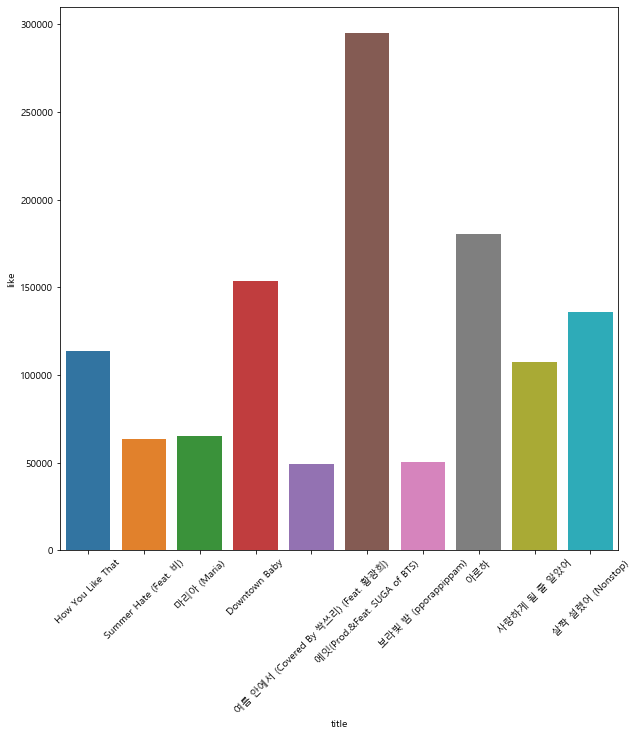

In [145]:
plt.figure(figsize=[10,10])

a = sns.barplot(x='title', y='like', data=js.head(10))

for item in a.get_xticklabels():
    item.set_rotation(45)

plt.show()

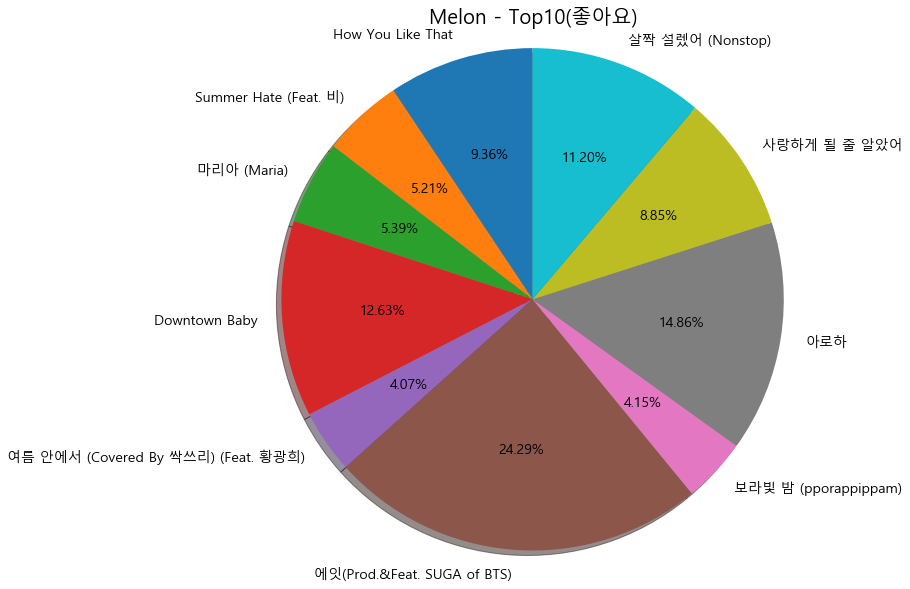

In [162]:
plt.figure(figsize=[10,10])
plt.pie(js['like'].head(10), 
        explode=[0,0,0,0,0,0,0,0,0,0], 
        labels=js['title'].head(10), 
        autopct='%1.2f%%', # second decimal place
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 14}) # text font size
plt.axis('equal') #  equal length of X and Y axis
plt.title('Melon - Top10(좋아요)', fontsize=20)

plt.show()

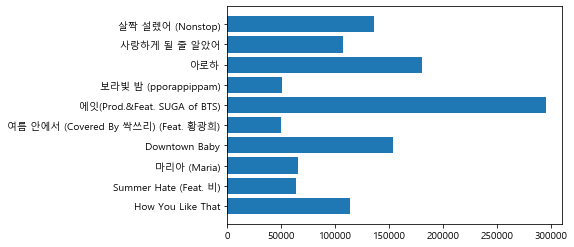

In [147]:
plt.figure()
plt.barh(js['title'].head(10), js['like'].head(10))
plt.show()